<a href="https://colab.research.google.com/github/fedhere/PUS2020_LYu/blob/master/HW5/reviewed_DEelectoralHW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the delaware opendata to extract the voting precincts geometries

https://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries

USe the election data from the turnout project to get the precinct turnout

https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv

In [ ]:

!pip install geopandas

# read in data

## read in electoral precinct geojson file in geopandas (directly from the URL)

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'map of delaware')

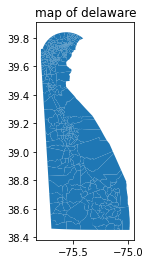

In [ ]:
de_elecp = gpd.read_file("https://opendata.arcgis.com/datasets/91c1f132c7d34885983c56b47dc675fd_0.geojson")
de_elecp.plot()
plt.title("map of delaware")

Figure caption: this is the electoral precinct map of the delaware

In [ ]:
de_elecp.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746..."
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760..."
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686..."
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661..."
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658..."


## read in turnout data - keep only election district, and votes


In [ ]:
turnout = pd.read_csv("https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv")
turnout = turnout[["election_district", "votes"]]
turnout

,election_district,votes
0,01-01,581
1,01-01,51
2,01-01,5
3,01-01,6
4,02-01,937
...,...,...
4719,07-41,545
4720,08-41,191
4721,08-41,335
4722,Total,3388


## group turnout data by election district and get the total number of data for that district

there are multiple entries for each geometry because there entries indicate the votes per candidate.


In [ ]:
turnout = turnout.groupby("election_district").sum()


In [ ]:
turnout

,votes
election_district,
01-01,2519
01-02,3632
01-03,2347
01-04,4676
01-05,3973
...,...
16-04,344
16-31,29
16-41,66


In [ ]:
turnout = pd.DataFrame(turnout)

## merge the turnout data with the electoral map


In [ ]:
de_elecmap = de_elecp.merge(turnout, left_on="EDRD_2012", right_on="election_district")

de_elecmap

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722
...,...,...,...,...,...,...,...,...
424,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451...",4719
425,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651...",2202
426,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585...",2086
427,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804...",1197


# make 3 maps: a coropleth of the population by electoral precinct, votes by precinct, and people density. 
Make sure you discuss patterns that appear, and that you consider the odd shape that delaware has in this map.... what is wrong with it? why does it not look like your usual maps of Delaware? how does this affect the descriptive analysis you just did? Make sure you choose appropriate colors maps and scheme to display the colors. Note that the last map may not be trivial to render. log10 function may be halpful (see notebook https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb but it is not required to use it) and also consider the individual values in the rows - are any of them unuaual? if there are consider dropping those values.

In [ ]:
de_elecmap.dropna

<bound method DataFrame.dropna of      OBJECTID   ID  ...                                           geometry  votes
0           1   20  ...  POLYGON ((-75.67816 39.74598, -75.67807 39.746...   2598
1           2   21  ...  POLYGON ((-75.72394 39.76115, -75.72393 39.760...   4390
2           3   22  ...  POLYGON ((-75.73601 39.68660, -75.73603 39.686...    690
3           4   23  ...  POLYGON ((-75.69655 39.66154, -75.69666 39.661...   4399
4           5   24  ...  POLYGON ((-75.75158 39.65865, -75.75109 39.658...   2722
..        ...  ...  ...                                                ...    ...
424       426  424  ...  POLYGON ((-75.12161 38.45119, -75.12186 38.451...   4719
425       427  425  ...  POLYGON ((-75.43038 38.65207, -75.43017 38.651...   2202
426       428  426  ...  POLYGON ((-75.36290 38.58543, -75.36268 38.585...   2086
427       429  427  ...  POLYGON ((-75.27245 38.80446, -75.27254 38.804...   1197
428       430  428  ...  POLYGON ((-75.40755 38.71621, -75.40730

Text(0, 0.5, 'frequency')

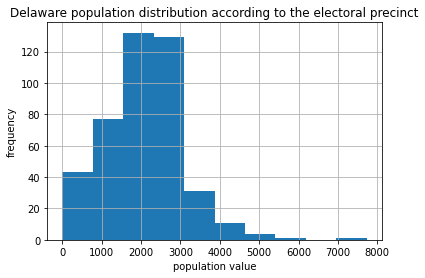

In [ ]:
pd.DataFrame(de_elecmap["POPULATION"].values).hist()
plt.title("Delaware population distribution according to the electoral precinct")
plt.xlabel("population value")
plt.ylabel("frequency")

Figure caption: This hist map indicates the population distribution accroding to the electoral precinct. According to the histogram, the highest population value is between 7000 to 8000 and most of the area have population around 1500 to 3000. 

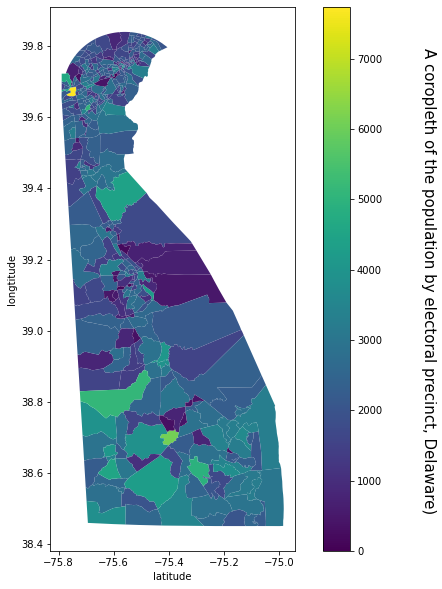

In [ ]:
# this is just an option for one of the plot. choose your esthetic and functionality as you see fit

# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
de_elecmap.plot("POPULATION", legend=True, ax=ax)
ax.set_xlabel("latitude")
ax.set_ylabel("longtitude")

fig.text(0.93, 0.5, "A coropleth of the population by electoral precinct, Delaware)", ha="center", 
      va="center", rotation=-90, fontsize=15)
fig.show()

figure caption: the above map indicates the popualation distribution by electoral precinct. The odd shape of the delaware is due to the including of water area. Most of the delaware maps will distinguish land area and water area(show different land features). However, this map is divided by electoral precint and the water area still indicates the number of population. Without showing the land features, the distribution of population map is inaccurate.
According to the population distribution map, area around newark has the highest population. 

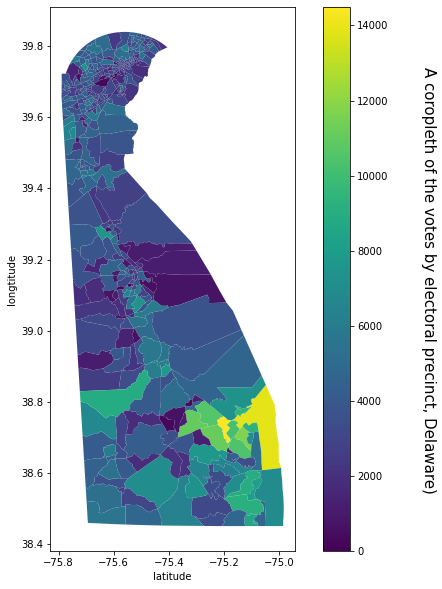

In [ ]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
de_elecmap.plot("votes", legend=True, ax=ax)
ax.set_xlabel("latitude")
ax.set_ylabel("longtitude")

fig.text(0.93, 0.5, "A coropleth of the votes by electoral precinct, Delaware)", ha="center", 
      va="center", rotation=-90, fontsize=15)
fig.show()

In [ ]:
de_elecmap[de_elecmap["votes"]>13000]

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes
360,362,359,01-14,3287,14,None,"POLYGON ((-75.01512 38.78866, -75.01532 38.789...",13916
387,389,396,05-20,3158,20,None,"POLYGON ((-75.18581 38.68329, -75.18580 38.683...",14487


figure caption: the above map indicates the votes distribution by electoral precinct. The odd shape of the delaware is due to the including of water area. Most of the delaware maps will distinguish land area and water area(show different land features). However, this map is divided by electoral precint and the water area has the highest number of votes. 
Potential reasons for water area has the highest vores: the voting location must accommodate all voters residing in the precinct by law; sites are to be fixed at well-known points and easily accessible to all electors entitled to vote therein. 


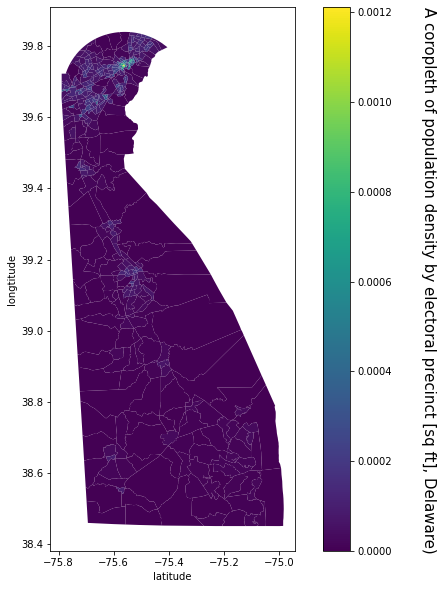

In [ ]:
geometry = de_elecmap.geometry.to_crs(epsg=2263)
area = geometry.area
de_elecmap["density"] = de_elecmap["POPULATION"]/area
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
de_elecmap.plot("density", legend=True, ax=ax)
ax.set_xlabel("latitude")
ax.set_ylabel("longtitude")

fig.text(0.93, 0.5, "A coropleth of population density by electoral precinct [sq ft], Delaware)", ha="center", 
      va="center", rotation=-90, fontsize=15)
fig.show()

figure caption: the above map indicates the population density by electoral precinct per sq ft. The odd shape of the delaware is due to the including of water area. Most of the delaware maps will distinguish land area and water area(show different land features). 
According to the map, we could see that north of new castle area has the highest value of population density, which is aligned with the population distribution map.

Text(0.5, 1.0, 'The histogram of population density')

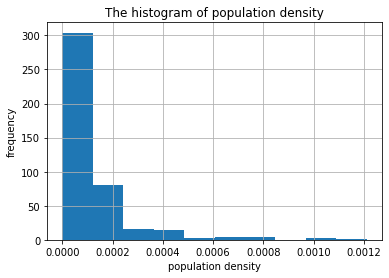

In [ ]:

de_elecmap["density"].hist()
plt.xlabel("population density")
plt.ylabel("frequency")
plt.title("The histogram of population density")

figure caption: according to the population density histogram. The population density per sq ft of each electoral precinct concentrates between 0 to 0.0002.

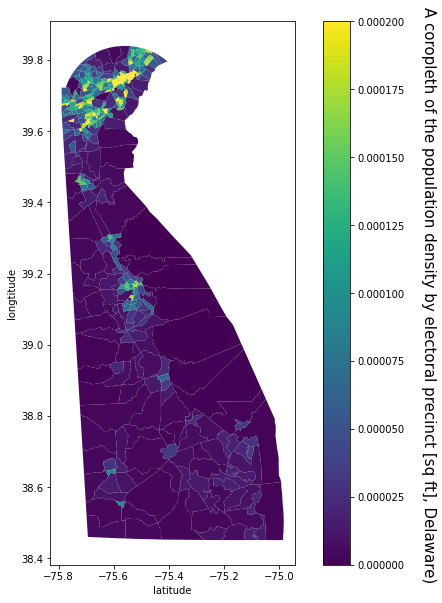

In [ ]:
geometry = de_elecmap.geometry.to_crs(epsg=2263)
area = geometry.area
de_elecmap["density"] = de_elecmap["POPULATION"]/area
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
de_elecmap.plot("density", legend=True, ax=ax, vmax = 0.0002, vmin =0)
ax.set_xlabel("latitude")
ax.set_ylabel("longtitude")

fig.text(0.93, 0.5, "A coropleth of the population density by electoral precinct [sq ft], Delaware)", ha="center", 
      va="center", rotation=-90, fontsize=15)
fig.show()

figure caption: in order to see the population density difference among various electoral precinct. I have reset the range of population density from 0 to 0.0002. According to the map above, we could see that electoral precint around wilmington has the highest value of population density, then is the electoral precint around dover(with population density around 0.0001). 

# FBB very well done, good plots good captions, and nice that you also made histograms!

# look at the variables' correlation

In [ ]:
import scipy as sp

In [ ]:
de_elecmap

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes,density
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598,0.000109
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390,0.000049
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690,0.000252
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399,0.000080
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722,0.000124
...,...,...,...,...,...,...,...,...,...
424,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451...",4719,0.000006
425,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651...",2202,0.000005
426,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585...",2086,0.000013
427,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804...",1197,0.000008


In [ ]:
de_elecmap.corr()

,OBJECTID,ID,POPULATION,votes,density
OBJECTID,1.000000,0.991589,0.037839,0.178269,-0.354172
ID,0.991589,1.000000,0.036542,0.178375,-0.353899
POPULATION,0.037839,0.036542,1.000000,0.624456,-0.032481
votes,0.178269,0.178375,0.624456,1.000000,-0.222647
density,-0.354172,-0.353899,-0.032481,-0.222647,1.000000


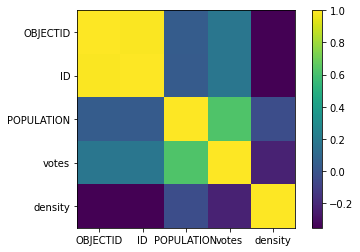

In [ ]:
#Correlation matrix - we will discuss this kind of plot soon
plt.imshow(de_elecmap.corr())
plt.xticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.yticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.colorbar();

figure caption: the correlation matrix indiates the correlation value among different variables. The yellow means the correlation value equals to 1. Thus, we could see that each value has the highest corelation value with itself. Moreover, according to the correlation matrix, we could the the population and vores have the high correlationship. 

# fit a line model to the data and a polynomial of second degree. 
You can use whatever package you want but if you use statsmodels you can get 
model diagnostics that will help you discuss the model

plot the model over the data

https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb


# extra credit: set up the problem as a machine leraning problem by splitting the sample into training and test data and evaluating the model on both sets.

This is in the notebook I shared, even if we did not get to talk about it in class https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
len(de_elecmap)

429

In [ ]:
# extract votes as target, population as feature
target = de_elecmap["votes"].values
feat = de_elecmap["POPULATION"].values

In [ ]:
# splitting the sample into training and test data 
x_train, x_test, y_train, y_test = train_test_split(feat, target, test_size = 0.25)

# add training data into a dataframe
df_train = pd.DataFrame([x_train, y_train]).T
df_train.columns = (['population', 'votes'])
df_train = df_train.sort_values(by=['population'], ascending=True)


# add testing data into a dataframe
df_test = pd.DataFrame([x_test, y_test]).T
df_test.columns = (['population', 'votes'])
df_test = df_test.sort_values(by=['population'], ascending=True)
df_test



,population,votes
51,121,374
46,123,103
24,247,342
90,323,853
72,327,658
...,...,...
41,3463,4447
73,3506,5268
59,4259,1683
48,4656,3463


In [ ]:
# fit a line model to the data
import statsmodels.formula.api as smf

model1 = smf.ols(formula='votes ~ population', data=df_train)
res1 = model1.fit()
res1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     212.8
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           2.77e-37
Time:                        03:10:35   Log-Likelihood:                -2825.5
No. Observations:                 321   AIC:                             5655.
Df Residuals:                     319   BIC:                             5663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    950.2716    206.310      4.606      0.000     544.372    1356.171
population     1.2875      0.088     14.588      0.000       1.114       1.461
==============================================================================
Omnibus:                      102.573   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              819.153
Skew:                           1.076   Prob(JB):                    1.33e-178
Kurtosis:                      10.524   Cond. No.                     5.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

for the model 1, the R squared is 0.4 and the Adj. R-squared is 0.398. 
## FBB use the same number of digits : if you use 1 number of digits for R2 then you need to round Adj R2 the same way - so they are both 0.4
Since Adjusted R-squared is used to determine how reliable the correlation is, both R squared and Adjusted R-squared indicate that line model has low performance. The correlation for the population and votes is positive and the value is 1.28,which indicates that every increase in the total population will increase 1.28 votes. And the p value is 0.00 in here, which shows there is a significant relationship between population and votes.

In [ ]:
model2 = smf.ols(formula='votes ~ np.power(population, 2) + population', data=df_train)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     157.6
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           2.78e-48
Time:                        05:47:05   Log-Likelihood:                -2797.0
No. Observations:                 321   AIC:                             5600.
Df Residuals:                     318   BIC:                             5611.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -531.6577    266.999     -1.991      0.047   -1056.964      -6.351
np.power(population, 2)    -0.0003    3.8e-05     -7.861      0.000      -0.000      -0.000
population                  2.7693      0.205     13.501      0.000       2.366       3.173
==============================================================================
Omnibus:                      145.959   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.841
Skew:                           1.807   Prob(JB):                    1.94e-187
Kurtosis:                      10.158   Cond. No.                     2.51e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For the model 2, the R squared is 0.498 and the Adj. R-squared is 0.495. Since Adjusted R-squared is used to determine how reliable the correlation is, both R squared and Adjusted R-squared indicate that line model has low performance. The correlation for the population**2 and votes is negative and the value is -0.0003.28,

# FBB formatting issue
 which indicates that as the population continues to increase, the growth rate of votes slows down. And the p value is 0.00 in here, which shows there is a significant relationship between population and votes.

In [ ]:
pred_te_1

51    1106.055135
46    1108.630070
24    1268.276006
90    1366.123516
72    1371.273385
         ...     
41    5408.770625
73    5464.131716
59    6433.594542
48    6944.719033
44    7323.234399
Length: 108, dtype: float64

In [ ]:
df_test["votes"]

51     374
46     103
24     342
90     853
72     658
      ... 
41    4447
73    5268
59    1683
48    3463
44    6610
Name: votes, Length: 108, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error

# -- predict the TRAINING and TESTING data
# fit a line model
pred_tr_1 = res1.predict(df_train["population"])
pred_te_1 = res1.predict(df_test["population"])


mse_train_1 = mean_squared_error(df_train["votes"], pred_tr_1) 
mse_test_1 = mean_squared_error(df_test["votes"], pred_te_1) 

# fit a polynomial of second degree.
pred_tr_2 = res2.predict(df_train["population"])
pred_te_2 = res2.predict(df_test["population"])

mse_train_2 = mean_squared_error(df_train["votes"], pred_tr_2) 
mse_test_2 = mean_squared_error(df_test["votes"], pred_te_2) 

# Validation on model 1
print('\n\n\033[1mLine model Performance \033[0m',
      '\nMean Absolute Error for Training data: {0:.2}'.format(mse_train_1),
       '\nMean Absolute Error for Test data: {0:.2}'.format(mse_test_1))



# Validation on model 2
print('\n\n\033[1m Polynomial of second degree model Performance \033[0m',
      '\nMean Absolute Error for Training data: {0:.2}'.format(mse_train_2),
       '\nMean Absolute Error for Test data: {0:.2}'.format(mse_test_2))



Line model Performance  
Mean Absolute Error for Training data: 2.6e+06 
Mean Absolute Error for Test data: 2.7e+06


 Polynomial of second degree model Performance  
Mean Absolute Error for Training data: 2.2e+06 
Mean Absolute Error for Test data: 2.6e+06


According to the MAE, on the training and test set was similar for linear regression model(model 1) , which suggests this model has limited overfitting. For the model 2, since the difference is relative large, this model has overfitting problem.

# FBB very good!

Text(0.5, 1.0, 'fit a line model to the training data and a polynomial of second degree.')

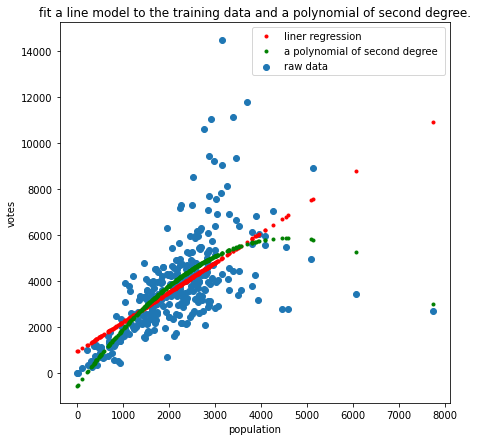

In [ ]:
# plot the prediction results and raw data
fig, ax = plt.subplots(figsize=[7, 7])
ax.scatter(df_train["population"], df_train["votes"], label = "raw data")
ax.plot(df_train.population, res1.predict(df_train["population"]), ".", c = "red", label = "liner regression")
ax.plot(df_train.population, res2.predict(df_train["population"]), ".", c = "green", label = "a polynomial of second degree ")

leg = ax.legend();
plt.xlabel('population')
plt.ylabel('votes')
plt.title('fit a line model to the training data and a polynomial of second degree')

figure caption: the above figure indicates a line model with training data and a polynomial of second degree model. According to the plot, we could see that the higher population, the higher votes. According to the plot, it looks like  model 2 indicates that for areas with higher population, the lower number of votes. It might have some other factors impact the increase of votes. However, more analysis needed to be done to prove the performace of both models.

# FBB models should be plotted as lines, indicating that the prediction can be made over a continuous range


Text(0.5, 1.0, 'fit a line model to the testing data and a polynomial of second degree.')

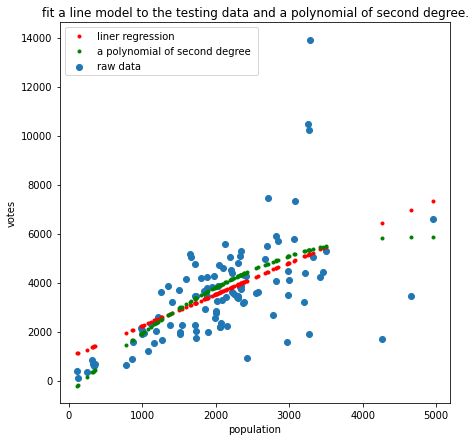

In [ ]:
fig, ax = plt.subplots(figsize=[7, 7])
ax.scatter(df_test["population"], df_test["votes"], label = "raw data")
ax.plot(df_test.population, res1.predict(df_test["population"]), ".", c = "red", label = "liner regression")
ax.plot(df_test.population, res2.predict(df_test["population"]), ".", c = "green", label = "a polynomial of second degree ")

leg = ax.legend();
plt.xlabel('population')
plt.ylabel('votes')
plt.title('fit a line model to the testing data and a polynomial of second degree.')

figure caption: the above figure indicates a line model with testing data and a polynomial of second degree model. According to the plot, we could see that the higher population, the higher votes. According to the plot,  when predicting population higher than 3500, model 2 indicates that for areas with higher population, the lower number of votes. It might have some other factors impact the increase of votes. However, more analysis needed to be done.

# Make an influence plot for each of the 2 models following the notebook in class. 
https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

Interpret it based on the slides and the notebook info
---



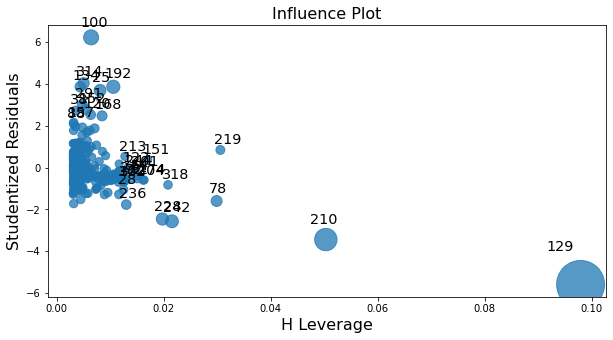

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sm.graphics.influence_plot(res1, ax=ax)

figure caption: This function creates a “bubble” plot of Studentized residuals versus hat leverage values. Points that are both are on the top right of the plot and are high influence points. For the high residual, it is outlier on the Y axis, and the high leverage is the point at the edge of the X axis. Thus according to the plot, point 129 is the one with high leverage, then is 210. And point 100 is the outlier.  



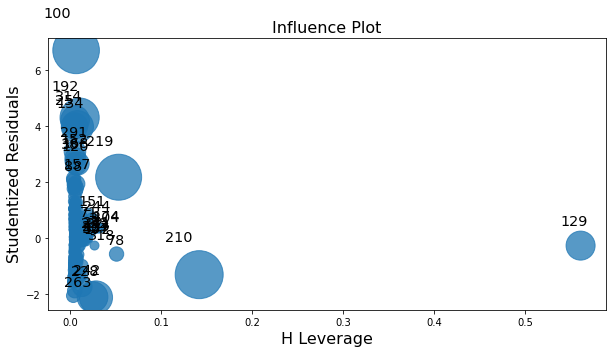

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sm.graphics.influence_plot(res2, ax=ax)

figure caption: This function creates a “bubble” plot of Studentized residuals versus hat leverage values. Points that are both are on the top right of the plot and are high influence points. For the high residual, it is outlier on the Y axis, and the high leverage is the point at the edge of the X axis. 

Because influence combines the leverage and residual of a case to measure how the parameter estimates would change if that case were excluded. According to the plot, point 210 have higher influence than point 129, which might due to the difference of residuals.

Also, outliers are cases that do not correspond to the model fitted to the bulk of the data. You can identify outliers as those cases with a large residual , though not all cases with a large residual are outliers and not all outliers are bad. Thus, further analysis needed to be done to evaluate the influence of point 100.

# Compare the models with the Likelihood Ration test (follow example in class)


In [ ]:
res2.compare_lr_test(res1)

(57.00442269675841, 4.3483291204858887e-14, 1.0)


likelihood ration test - set alpha to alpha=0.05

 the NH is that the model2 is better than the model1

 the likelihood ration statistics is 57.00, which corresponds to a p-value of 04.34e-14

since the likelishood ration statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (=1 here)
this corresponds being able to reject the NH at alpha 0.05

# FBB good!


# Discuss your model: what it means mathematically and what it means in practice

You must discuss the model on the basis of the model summary (R squared, adjusted R squared, p-values for the coefficients etc)

You must discuss the influence plot on the basis of the lecture discussion and of the reading

You must assess wheather the more complex model is better

For the model 1, the R squared is 0.4 and the Adj. R-squared is 0.398. Since Adjusted R-squared is used to determine how reliable the correlation is, both R squared and Adjusted R-squared indicate that line model has low performance. The correlation for the population and votes is positive and the value is 1.28,which indicates that every increase in the total population will increase 1.28 votes. And the p value is 0.00 in here, which shows there is a significant relationship between population and votes.
For the model 2, the R squared is 0.498 and the Adj. R-squared is 0.495. Since Adjusted R-squared is used to determine how reliable the correlation is, both R squared and Adjusted R-squared indicate that line model has low performance. The correlation value between the population**2 and votes is -0.0003.28, which indicates that as the population continues to increase, the growth rate of votes slows down. And the p value is 0.00 in here, which shows there is a significant relationship between population and votes.

For the model 1,  this influence function creates a “bubble” plot of Studentized residuals versus hat leverage values. Points that are both are on the top right of the plot and are high influence points. For the high residual, it is outlier on the Y axis, and the high leverage is the point at the edge of the X axis. Thus according to the plot, point 129 is the one with high leverage, then is 210. And point 100 is the outlier.
For the model 2, This function creates a “bubble” plot of Studentized residuals versus hat leverage values. Points that are both are on the top right of the plot and are high influence points. For the high residual, it is outlier on the Y axis, and the high leverage is the point at the edge of the X axis.

Because influence combines the leverage and residual of a case to measure how the parameter estimates would change if that case were excluded. According to the plot, point 210 have higher influence than point 129, which might due to the difference of residuals.

Also, outliers are cases that do not correspond to the model fitted to the bulk of the data. You can identify outliers as those cases with a large residual , though not all cases with a large residual are outliers and not all outliers are bad. Thus, further analysis needed to be done to evaluate the influence of point 100.

According to the likelihood ratio and R value, it indicates the model2 is better than the model1 (more complex model is better). In practice, this means when the population increases to a certain number, the growth rate of the total number of votes will slow down. Population growth will not bring a corresponding increase in the number of votes, and there are other reasons that affect the number of votes.


# Extra Credit: Collect any other variable about Delaware that you think may be relevant to predit turn out and fit a line model using that as an exogenous variable.

You have a few options here: 
- dig for some other variable that is available at the electoral precinct level 
- get a variable at the county level , which means that the endogenous variable (votes) will be far more granular than the exogenous one... how would you deal with it?
- get a variable at a hith resolution geomeetry, such as census block or census tract, and merge the geometry. This is the hardest option. The Census bureau offers advise on conversion between geometries

Discuss your model: what it means mathematically and what it means in practice
